In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
sales=pd.read_csv('/content/advertising.csv')
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Data Analysis and Visualization

In [5]:
sales.shape

(200, 4)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


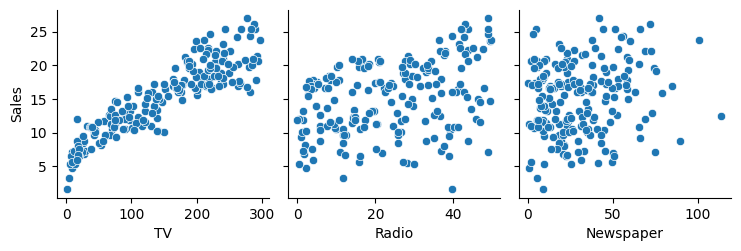

In [8]:
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

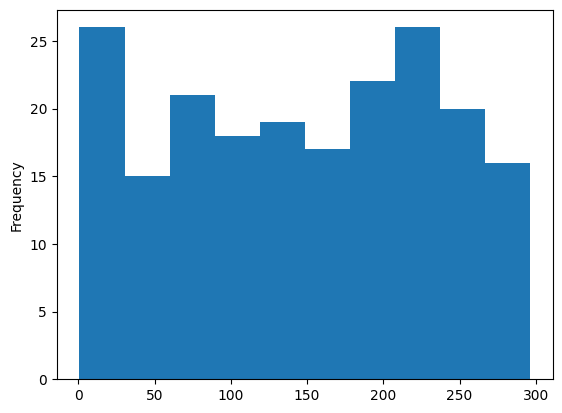

In [9]:
sales['TV'].plot.hist(bins=10,xlabel='TV')

<Axes: ylabel='Frequency'>

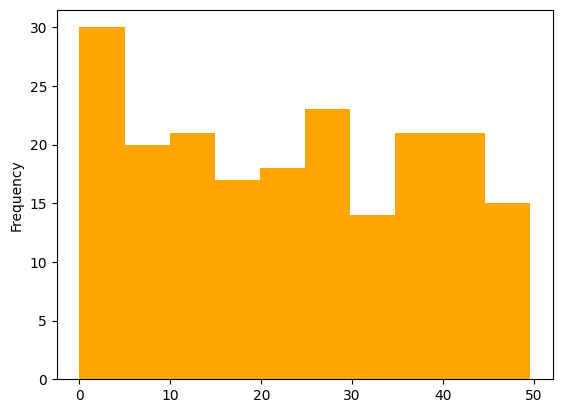

In [10]:
sales['Radio'].plot.hist(bins=10,color='orange',xlabel='Radio')

<Axes: ylabel='Frequency'>

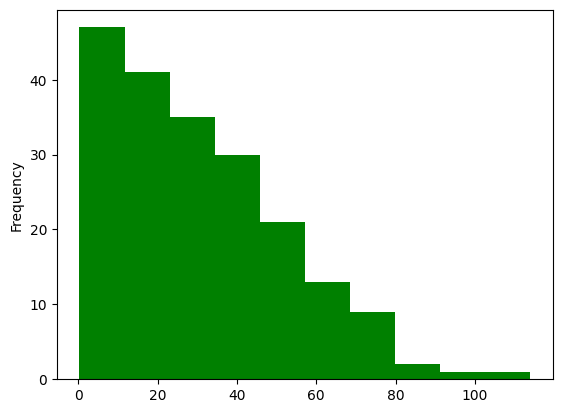

In [11]:
sales['Newspaper'].plot.hist(bins=10,color='green',xlabel='Newspaper')

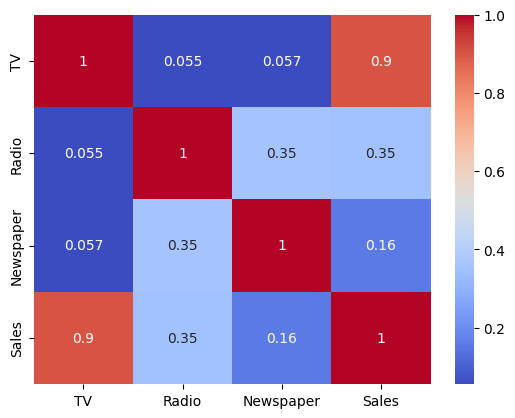

In [12]:
sns.heatmap(sales.corr(),cmap='coolwarm',annot=True)
plt.show()

Splitting and training

In [27]:
x=sales.iloc[:,0:1]
y=sales.iloc[:,-1]

In [28]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [29]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

Linear Regression Model

In [65]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred=model.predict(x_test)
y_pred

array([16.10799649, 17.91634288, 23.40898378,  7.56764408, 19.31907886,
       11.13926903, 19.12190714,  9.72526609, 19.4373819 , 16.77274688,
        8.68307269, 10.07454172, 20.11903272,  7.21273497, 14.76722876,
       16.49670646,  7.31977105, 18.04027939, 11.15053599, 20.28240357,
       19.83735883, 10.72802515,  9.04924875, 21.04292308, 10.79562688,
        9.92243782, 18.93600237, 14.75596181, 11.82091985,  7.38173931,
       18.1642159 , 10.80689384, 18.1135146 ,  7.86058492, 22.72169948,
       20.3274714 ,  9.62949697, 22.32735603, 13.5109632 ,  8.45773358,
       13.44336147, 16.87978296,  9.33655612, 10.41818387, 19.52751754,
        9.0605157 , 10.88576253, 15.20664004, 12.80114499, 11.20687076,
       11.31390684, 16.39530386,  7.39863974,  7.34793844, 11.21250424,
       14.1982475 , 11.04349991, 23.22871249,  8.01268883, 18.04027939,
       22.92450468, 17.32482771, 13.26872366,  8.24929489, 23.28504727,
        8.00142187, 23.44841812,  7.96198752, 14.47428792,  8.35

Model Evaluation

In [67]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.8220363173849193

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.2253143236720083

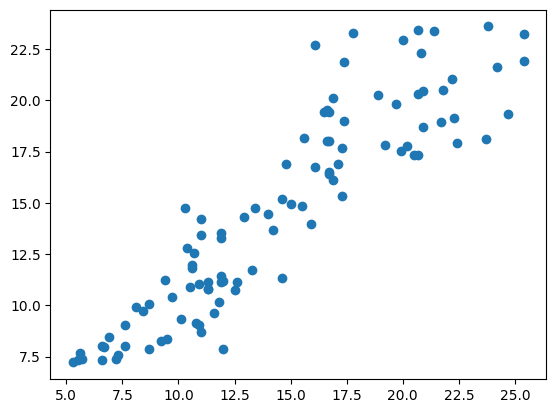

In [69]:
plt.scatter(y_test,y_pred)

In [70]:
model.coef_

array([0.05633478])

In [71]:
model.intercept_

6.908527167232716

Sales = 6.908527167232716 + 0.05633478 * TV

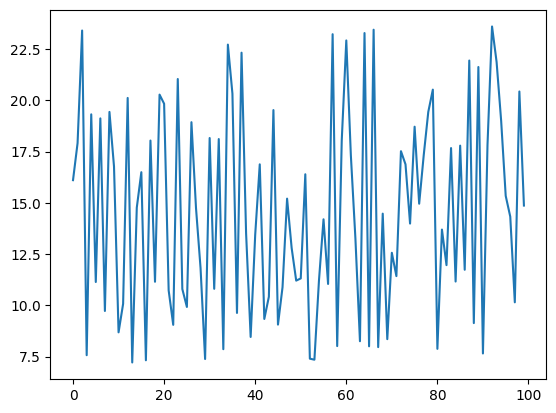

In [72]:
plt.plot(y_pred)

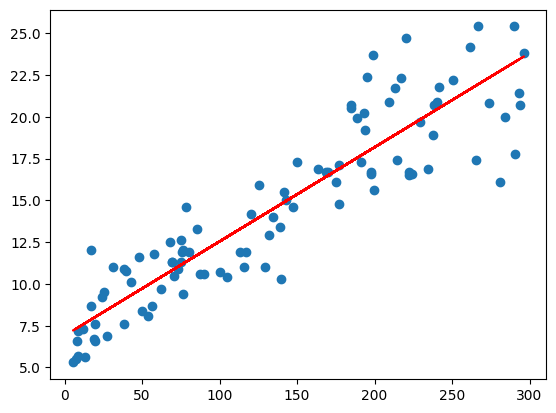

In [73]:
plt.scatter(x_test, y_test)
plt.plot(x_test,6.908527167232716 + 0.05633478*x_test,'r')
plt.show()

The Model is able to predict the sales using the advertising platform dataset.